# OntoNotes 5.0 Dataset Exploration (English)

This notebook explores the English portion of the OntoNotes 5.0 dataset, which is a large, multilingual corpus annotated with syntactic and semantic information including:

- Named Entity Recognition (NER)
- Part-of-Speech (POS) tagging
- Coreference resolution
- Syntactic constituency parsing
- Semantic role labeling

We'll explore the dataset structure, examine the splits, and analyze various statistics to understand its composition.

## 1. Setup and Installation

First, let's install and import the necessary libraries.

In [7]:
# Install required packages
%pip install datasets transformers pandas matplotlib seaborn tqdm

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import necessary libraries
import datasets
from datasets import load_dataset, get_dataset_config_names
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from tqdm.auto import tqdm

# Set up visualization styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 2. Loading the OntoNotes 5.0 Dataset

OntoNotes 5.0 is available through the Hugging Face Datasets library. We'll load only the English portion.

In [9]:
# Check available configurations for OntoNotes
config_names = get_dataset_config_names("conll2012_ontonotesv5")
print("Available configurations for OntoNotes 5.0:")
for config in config_names:
    print(f"- {config}")

# Load the English portion of OntoNotes 5.0
ontonotes_english = load_dataset("conll2012_ontonotesv5", "english_v12")
print("\nDataset loaded successfully!")
print(ontonotes_english)

Available configurations for OntoNotes 5.0:
- english_v4
- chinese_v4
- arabic_v4
- english_v12

Dataset loaded successfully!
DatasetDict({
    train: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 10539
    })
    validation: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 1370
    })
    test: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 1200
    })
})


## 3. Understanding Dataset Structure

Let's examine the structure of the dataset, including the available features and their formats.

In [10]:
# Get information about the features in the dataset
print("Features in the dataset:")
for feature, feature_type in ontonotes_english["train"].features.items():
    print(f"- {feature}: {feature_type}")

# Examine the first example to understand the data structure
first_example = ontonotes_english["train"][0]
print("\nFirst example in the training set:")
for key, value in first_example.items():
    if isinstance(value, list) and len(value) > 10:
        print(f"{key}: {value[:10]}... (truncated, length: {len(value)})")
    else:
        print(f"{key}: {value}")

Features in the dataset:
- document_id: Value(dtype='string', id=None)
- sentences: [{'part_id': Value(dtype='int32', id=None), 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=ClassLabel(names=['XX', '``', '$', "''", '*', ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'VERB', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None), 'parse_tree': Value(dtype='string', id=None), 'predicate_lemmas': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'predicate_framenet_ids': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'word_senses': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), 'speaker': Value(dtype='string', id=None), 'named_entities':

## 4. Dataset Size and Splits

Let's analyze the size of each split (train, validation, test) and the overall dataset size.

Training set size: 10539 examples (80.40% of total)
Validation set size: 1370 examples (10.45% of total)
Test set size: 1200 examples (9.15% of total)
Total dataset size: 13109 examples


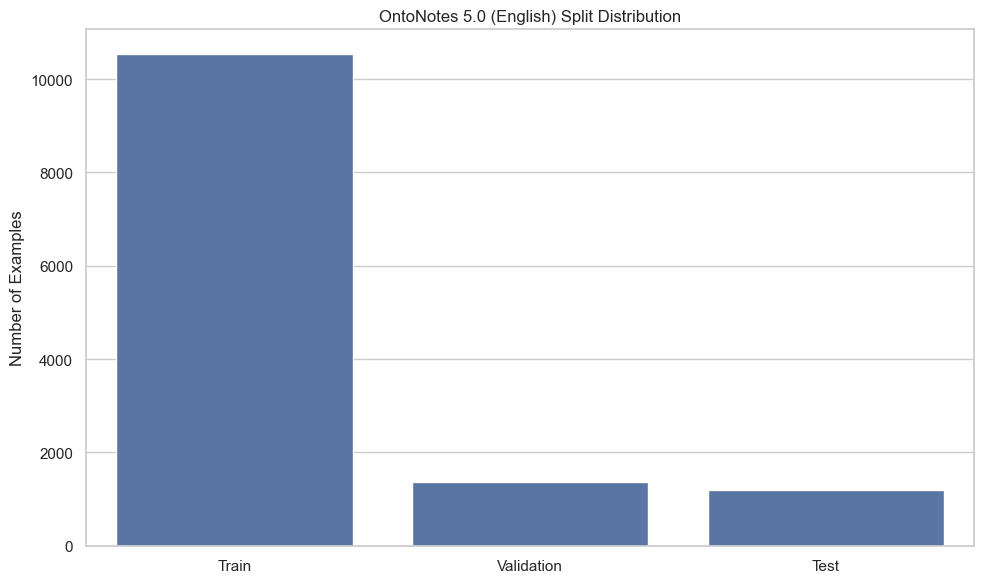

In [11]:
# Get the number of examples in each split
train_size = len(ontonotes_english["train"])
validation_size = len(ontonotes_english["validation"])
test_size = len(ontonotes_english["test"])
total_size = train_size + validation_size + test_size

print(f"Training set size: {train_size} examples ({train_size/total_size:.2%} of total)")
print(f"Validation set size: {validation_size} examples ({validation_size/total_size:.2%} of total)")
print(f"Test set size: {test_size} examples ({test_size/total_size:.2%} of total)")
print(f"Total dataset size: {total_size} examples")

# Visualize the split distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=['Train', 'Validation', 'Test'], 
            y=[train_size, validation_size, test_size])
plt.title('OntoNotes 5.0 (English) Split Distribution')
plt.ylabel('Number of Examples')
plt.tight_layout()
plt.show()

## 5. Document and Sentence Analysis

Let's examine the number of documents, sentences, and tokens in the dataset.

In [12]:
# Function to count sentences and tokens in a split
def count_sentences_and_tokens(split):
    n_sentences = 0
    n_tokens = 0
    
    for example in tqdm(split, desc=f"Processing {split.split}"):
        n_sentences += len(example['sentences'])
        for sentence in example['sentences']:
            n_tokens += len(sentence)
    
    return n_sentences, n_tokens

# Count for each split
train_sentences, train_tokens = count_sentences_and_tokens(ontonotes_english["train"])
val_sentences, val_tokens = count_sentences_and_tokens(ontonotes_english["validation"])
test_sentences, test_tokens = count_sentences_and_tokens(ontonotes_english["test"])

# Aggregate counts
total_sentences = train_sentences + val_sentences + test_sentences
total_tokens = train_tokens + val_tokens + test_tokens

# Print statistics
print(f"Training set: {train_sentences} sentences, {train_tokens} tokens")
print(f"Validation set: {val_sentences} sentences, {val_tokens} tokens")
print(f"Test set: {test_sentences} sentences, {test_tokens} tokens")
print(f"Total: {total_sentences} sentences, {total_tokens} tokens")

# Average tokens per sentence
avg_tokens_per_sentence = total_tokens / total_sentences
print(f"Average tokens per sentence: {avg_tokens_per_sentence:.2f}")

# Average sentences per document
avg_sentences_per_doc = total_sentences / total_size
print(f"Average sentences per document: {avg_sentences_per_doc:.2f}")

Processing test: 100%|██████████| 1200/1200 [00:00<00:00, 1429.26it/s]

Training set: 115812 sentences, 1273932 tokens
Validation set: 15680 sentences, 172480 tokens
Test set: 12217 sentences, 134387 tokens
Total: 143709 sentences, 1580799 tokens
Average tokens per sentence: 11.00
Average sentences per document: 10.96


## 6. Genre Distribution

OntoNotes 5.0 contains text from various genres (news, conversation, web text, etc.). Let's analyze the distribution of genres in the dataset.

Genre distribution in OntoNotes 5.0 (English):
  Genre Code                   Genre  Train  Validation  Test  Total
6         wb                Web Text   7334         925   922   9181
3         nw                Newswire   1832         294   125   2251
1         bn          Broadcast News    850         101   103   1054
4         pt              Pivot Text    314          24    24    362
0         bc  Broadcast Conversation    104          14    14    132
2         mz                Magazine     64           7     7     78
5         tc  Telephone Conversation     41           5     5     51


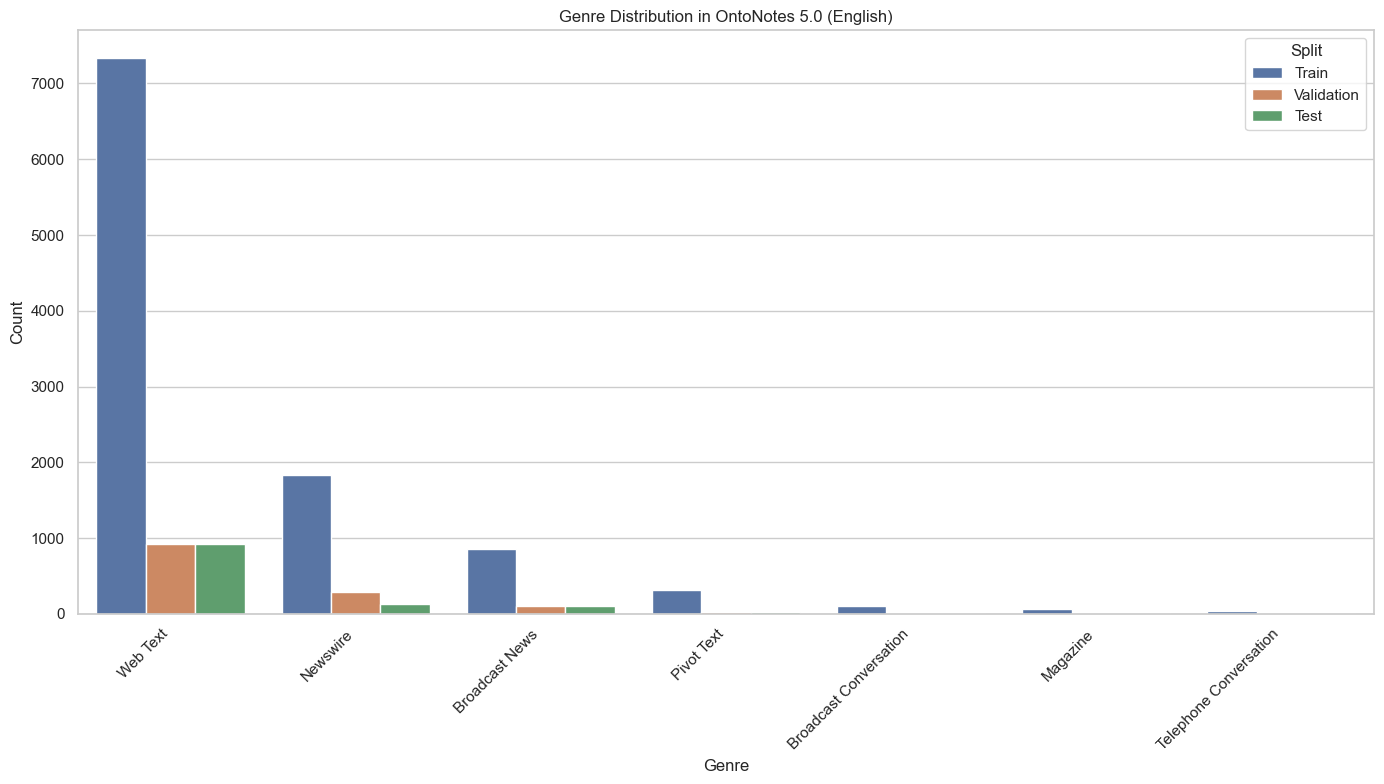

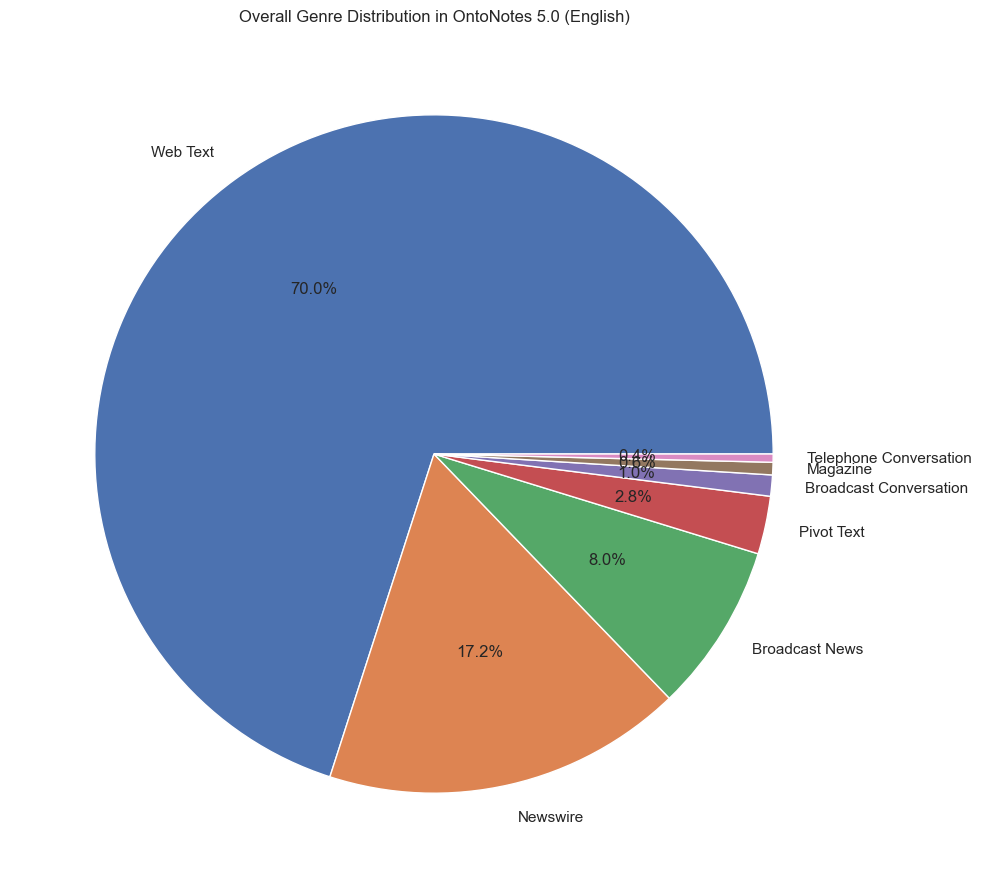

In [13]:
# Count documents by genre
def count_genres(split):
    genres = Counter()
    for example in split:
        # Extract genre from document_id (format: genre/source/...)
        genre = example['document_id'].split('/')[0]
        genres[genre] += 1
    return genres

# Get genre counts for each split
train_genres = count_genres(ontonotes_english["train"])
val_genres = count_genres(ontonotes_english["validation"])
test_genres = count_genres(ontonotes_english["test"])

# Combine all genres
all_genres = train_genres.copy()
for genre, count in val_genres.items():
    all_genres[genre] += count
for genre, count in test_genres.items():
    all_genres[genre] += count

genre_names = {
    'wb': 'Web Text',
    'nw': 'Newswire',
    'bn': 'Broadcast News',
    'pt': 'Pivot Text',
    'bc': 'Broadcast Conversation',
    'mz': 'Magazine',
    'tc': 'Telephone Conversation'
}

# Create a DataFrame for visualization
genre_df = pd.DataFrame({
    'Genre Code': list(all_genres.keys()),
    'Genre': [genre_names.get(genre, genre) for genre in all_genres.keys()],
    'Train': [train_genres[genre] for genre in all_genres.keys()],
    'Validation': [val_genres[genre] for genre in all_genres.keys()],
    'Test': [test_genres[genre] for genre in all_genres.keys()],
    'Total': [all_genres[genre] for genre in all_genres.keys()]
})

# Sort by total count
genre_df = genre_df.sort_values('Total', ascending=False)

# Print genre distribution
print("Genre distribution in OntoNotes 5.0 (English):")
print(genre_df)

# Visualize genre distribution
plt.figure(figsize=(14, 8))
genre_df_plot = pd.melt(genre_df, id_vars=['Genre', 'Genre Code'], 
                       value_vars=['Train', 'Validation', 'Test'],
                       var_name='Split', value_name='Count')
sns.barplot(x='Genre', y='Count', hue='Split', data=genre_df_plot)
plt.title('Genre Distribution in OntoNotes 5.0 (English)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart of overall genre distribution
plt.figure(figsize=(10, 10))
plt.pie(genre_df['Total'], labels=genre_df['Genre'], autopct='%1.1f%%')
plt.title('Overall Genre Distribution in OntoNotes 5.0 (English)')
plt.tight_layout()
plt.show()

## 7. Named Entity Analysis

Let's explore the named entity annotations in the dataset to understand the distribution of entity types.

In [14]:
# Explore the first sentence's structure to understand how named entities are stored
sentence = ontonotes_english["train"][1]['sentences'][0]
print("First sentence words:", sentence['words'])
print("Named entities (integers):", sentence['named_entities'])

# Examining the feature structure
print("\nFeature structure:")
print(ontonotes_english["train"].features['sentences'])
print("\nNamed entities:", ontonotes_english["train"].features['sentences'][0]['named_entities'])

# Create a placeholder mapping - we'll need to refine this based on observations
entity_map = dict(enumerate(ontonotes_english["train"].features['sentences'][0]['named_entities'].feature.names))

# Print mapped entities for a sample sentence
print("\nAttempting to map entities for the example sentence:")
for word, entity_id in zip(sentence['words'], sentence['named_entities']):
    entity_name = entity_map.get(entity_id, f"UNKNOWN-{entity_id}")
    print(f"{word}: {entity_name} ({entity_id})")

# Let's examine a few more examples to refine our mapping
print("\nExamining named entities across multiple sentences:")
for i in range(2, 5):  # Check a few more examples
    if i < len(ontonotes_english["train"]) and len(ontonotes_english["train"][i]['sentences']) > 0:
        sample_sentence = ontonotes_english["train"][i]['sentences'][0]
        print(f"\nSample {i}, Words: {sample_sentence['words']}")
        print(f"Sample {i}, Entities: {list(map(lambda x: entity_map[x], sample_sentence['named_entities']))}")

First sentence words: ['Abramov', 'had', 'a', 'car', 'accident', 'in', 'Moscow', 'last', 'night', 'and', 'was', 'seriously', 'injured', '.']
Named entities (integers): [1, 0, 0, 0, 0, 0, 9, 17, 18, 0, 0, 0, 0, 0]

Feature structure:
[{'part_id': Value(dtype='int32', id=None), 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=ClassLabel(names=['XX', '``', '$', "''", '*', ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'VERB', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None), 'parse_tree': Value(dtype='string', id=None), 'predicate_lemmas': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'predicate_framenet_ids': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None

Extracting entities from test: 100%|██████████| 1200/1200 [00:00<00:00, 1491.35it/s]

Named entity type distribution in OntoNotes 5.0 (English):
    Entity Type  Train  Validation  Test  Total
0           ORG  56954        8964  4705  70623
7          DATE  41198        6692  3984  51874
8        PERSON  37393        5354  3646  46393
6           GPE  27354        4555  3263  35172
15        MONEY  15204        2308  1130  18642
3      CARDINAL  14430        2282  1375  18087
5          NORP   9956        1345  1152  12453
14      PERCENT   9226        1566  1027  11819
1   WORK_OF_ART   4513         639   516   5668
2           LOC   4143         596   417   5156
12         TIME   3832         759   496   5087
10     QUANTITY   3173         522   415   4110
4         EVENT   3096         504   250   3850
9           FAC   3089         363   392   3844
11      ORDINAL   2215         339   213   2767
13      PRODUCT   1812         471   160   2443
16          LAW   1657         239   162   2058
17     LANGUAGE    372          36    22    430


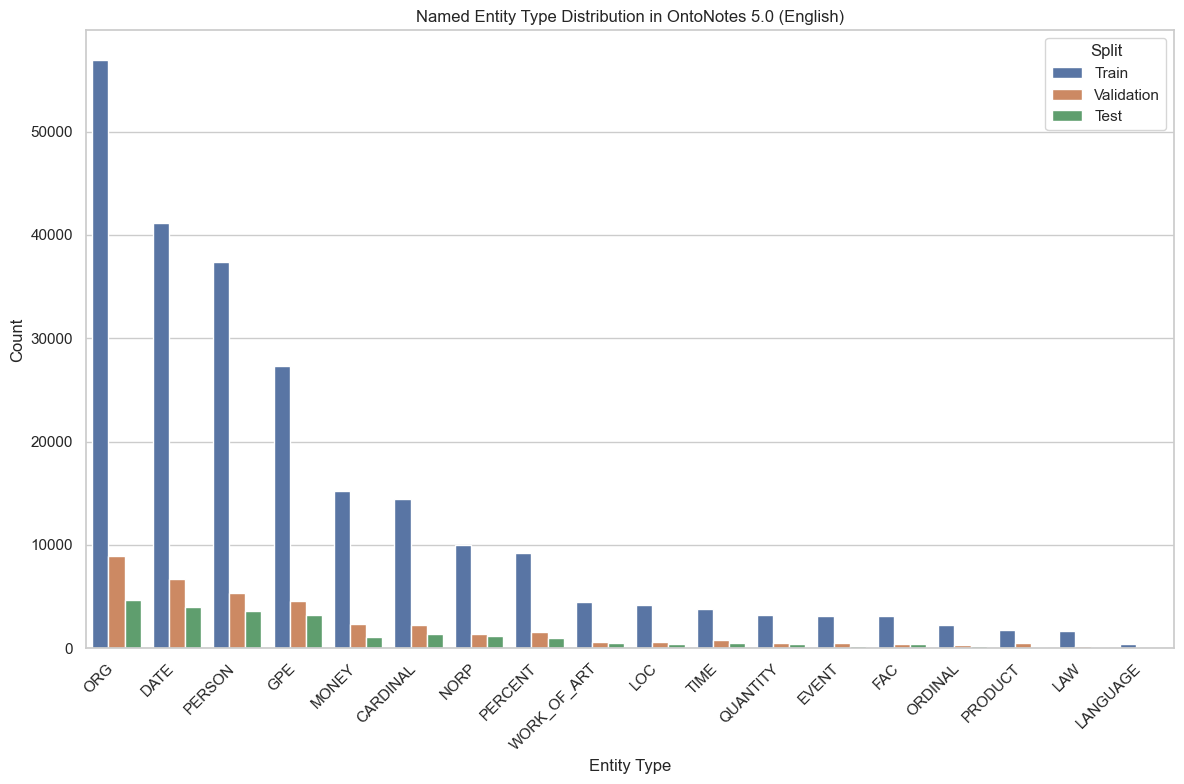

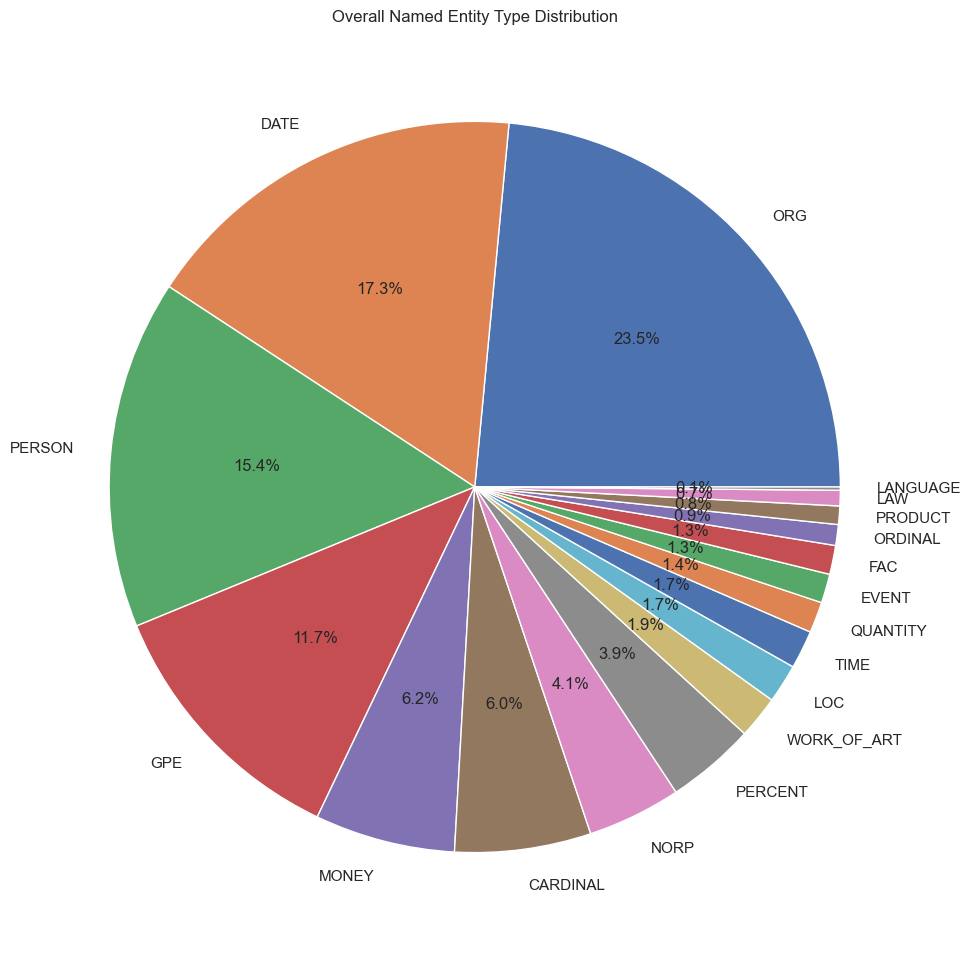

In [15]:
# Function to extract named entities from a split
def extract_named_entities(split):
    entities = Counter()
    
    for example in tqdm(split, desc=f"Extracting entities from {split.split}"):
        for sentence in example['sentences']:
            if 'named_entities' in sentence:
                for entity_id in sentence['named_entities']:
                    # Skip "O" (non-entity) labels
                    if entity_id != 0:  # 0 is typically the "O" label
                        entity_name = entity_map.get(entity_id, f"UNKNOWN-{entity_id}")
                        # Extract the base entity type (e.g., "PERSON" from "B-PERSON")
                        if '-' in entity_name:
                            entity_type = entity_name.split('-')[1]
                        else:
                            entity_type = entity_name
                        entities[entity_type] += 1
    return entities

# Extract entities from each split
train_entities = extract_named_entities(ontonotes_english["train"])
val_entities = extract_named_entities(ontonotes_english["validation"])
test_entities = extract_named_entities(ontonotes_english["test"])

# Combine all entities
all_entities = train_entities.copy()
for entity, count in val_entities.items():
    all_entities[entity] += count
for entity, count in test_entities.items():
    all_entities[entity] += count

# Create a DataFrame for visualization
entity_df = pd.DataFrame({
    'Entity Type': list(all_entities.keys()),
    'Train': [train_entities.get(entity, 0) for entity in all_entities.keys()],
    'Validation': [val_entities.get(entity, 0) for entity in all_entities.keys()],
    'Test': [test_entities.get(entity, 0) for entity in all_entities.keys()],
    'Total': [all_entities[entity] for entity in all_entities.keys()]
})

# Sort by total count
entity_df = entity_df.sort_values('Total', ascending=False)

# Print entity type distribution
print("Named entity type distribution in OntoNotes 5.0 (English):")
print(entity_df)

# Visualize entity type distribution
plt.figure(figsize=(12, 8))
entity_df_plot = pd.melt(entity_df, id_vars=['Entity Type'], 
                         value_vars=['Train', 'Validation', 'Test'],
                         var_name='Split', value_name='Count')
sns.barplot(x='Entity Type', y='Count', hue='Split', data=entity_df_plot)
plt.title('Named Entity Type Distribution in OntoNotes 5.0 (English)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart of overall entity type distribution
plt.figure(figsize=(10, 10))
plt.pie(entity_df['Total'], labels=entity_df['Entity Type'], autopct='%1.1f%%')
plt.title('Overall Named Entity Type Distribution')
plt.tight_layout()
plt.show()

In [16]:
# Select a random sample
import random
random.seed(42)
sample_idx = random.randint(0, len(ontonotes_english["train"]) - 1)
sample = ontonotes_english["train"][sample_idx]

# Get POS tag names from the dataset features
pos_names = ontonotes_english["train"].features['sentences'][0]['pos_tags'].feature.names
id2pos = dict(enumerate(pos_names))

print(f"Sample document (index {sample_idx}):")
print(f"Document ID: {sample['document_id']}")
print(f"Number of sentences: {len(sample['sentences'])}")

# Print first few sentences with their annotations
print("\nSample sentences with annotations:")
for i in range(min(3, len(sample['sentences']))):
    print(f"\nSentence {i+1}:")
    words = sample['sentences'][i]['words']
    pos_tag_ids = sample['sentences'][i]['pos_tags']
    entity_ids = sample['sentences'][i]['named_entities']
    
    # Create a formatted display of the sentence with annotations
    formatted_tokens = []
    for word, pos_id, entity_id in zip(words, pos_tag_ids, entity_ids):
        pos_tag = id2pos[pos_id]
        entity_name = entity_map.get(entity_id, f"UNKNOWN-{entity_id}")
        entity_str = f"({entity_name})" if entity_name != "O" else ""
        formatted_tokens.append(f"{word}/{pos_tag}{entity_str}")
    
    print(" ".join(formatted_tokens))

Sample document (index 10476):
Document ID: wb/sel/97/sel_9752
Number of sentences: 1

Sample sentences with annotations:

Sentence 1:
I/XX was/XX so/XX turned/XX on/XX by/XX this/XX show/XX of/XX manhood/XX that/XX I/XX could/XX feel/XX my/XX own/XX piece/XX of/XX meat/XX start/XX to/XX sizzle/VERB ./XX


## 10. Summary and Conclusion

This notebook explored the English portion of the OntoNotes 5.0 dataset, examining its structure, size, and content distribution. Here's a summary of our findings:

In [17]:
# Create a summary of the dataset
summary = {
    "Total Documents": total_size,
    "Total Sentences": total_sentences,
    "Total Tokens": total_tokens,
    "Train/Val/Test Split": f"{train_size}/{validation_size}/{test_size} ({train_size/total_size:.1%}/{validation_size/total_size:.1%}/{test_size/total_size:.1%})",
    "Number of Genres": len(all_genres),
    "Top 3 Genres": ", ".join([f"{genre} ({count})" for genre, count in all_genres.most_common(3)]),
    "Number of Entity Types": len(all_entities),
    "Top 3 Entity Types": ", ".join([f"{entity} ({count})" for entity, count in all_entities.most_common(3)]),
    "Avg. Sentences per Document": f"{avg_sentences_per_doc:.2f}",
    "Avg. Tokens per Sentence": f"{avg_tokens_per_sentence:.2f}"
}

# Display summary
print("OntoNotes 5.0 (English) Dataset Summary:")
for key, value in summary.items():
    print(f"- {key}: {value}")


OntoNotes 5.0 (English) Dataset Summary:
- Total Documents: 13109
- Total Sentences: 143709
- Total Tokens: 1580799
- Train/Val/Test Split: 10539/1370/1200 (80.4%/10.5%/9.2%)
- Number of Genres: 7
- Top 3 Genres: wb (9181), nw (2251), bn (1054)
- Number of Entity Types: 18
- Top 3 Entity Types: ORG (70623), DATE (51874), PERSON (46393)
- Avg. Sentences per Document: 10.96
- Avg. Tokens per Sentence: 11.00


In [19]:
# Get map of onto notes entity types
def get_ontonotes_entity_map():
    train_features = ontonotes_english["train"].features['sentences'][0]['named_entities'].feature
    entity_map = {i: name for i, name in enumerate(train_features.names)}
    return entity_map

print(get_ontonotes_entity_map())

{0: 'O', 1: 'B-PERSON', 2: 'I-PERSON', 3: 'B-NORP', 4: 'I-NORP', 5: 'B-FAC', 6: 'I-FAC', 7: 'B-ORG', 8: 'I-ORG', 9: 'B-GPE', 10: 'I-GPE', 11: 'B-LOC', 12: 'I-LOC', 13: 'B-PRODUCT', 14: 'I-PRODUCT', 15: 'B-DATE', 16: 'I-DATE', 17: 'B-TIME', 18: 'I-TIME', 19: 'B-PERCENT', 20: 'I-PERCENT', 21: 'B-MONEY', 22: 'I-MONEY', 23: 'B-QUANTITY', 24: 'I-QUANTITY', 25: 'B-ORDINAL', 26: 'I-ORDINAL', 27: 'B-CARDINAL', 28: 'I-CARDINAL', 29: 'B-EVENT', 30: 'I-EVENT', 31: 'B-WORK_OF_ART', 32: 'I-WORK_OF_ART', 33: 'B-LAW', 34: 'I-LAW', 35: 'B-LANGUAGE', 36: 'I-LANGUAGE'}
